<a href="https://colab.research.google.com/github/keyom-ai/multimodal/blob/main/gpt_4_image_text_speech_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%%capture
# update or install the necessary libraries
!pip install --upgrade openai
!pip install --upgrade langchain
!pip install --upgrade python-dotenv
!pip install pillow


import os
import IPython
from langchain.llms import OpenAI
from dotenv import load_dotenv

from openai import OpenAI
from IPython.display import Audio



In [3]:
import openai
os.environ["OPENAI_API_KEY"]='sk-abcdefghijklmnopqrstuvwxyz'
openai.api_key = os.getenv("OPENAI_API_KEY")
client = OpenAI(
    api_key=os.getenv("openai.api_key"))

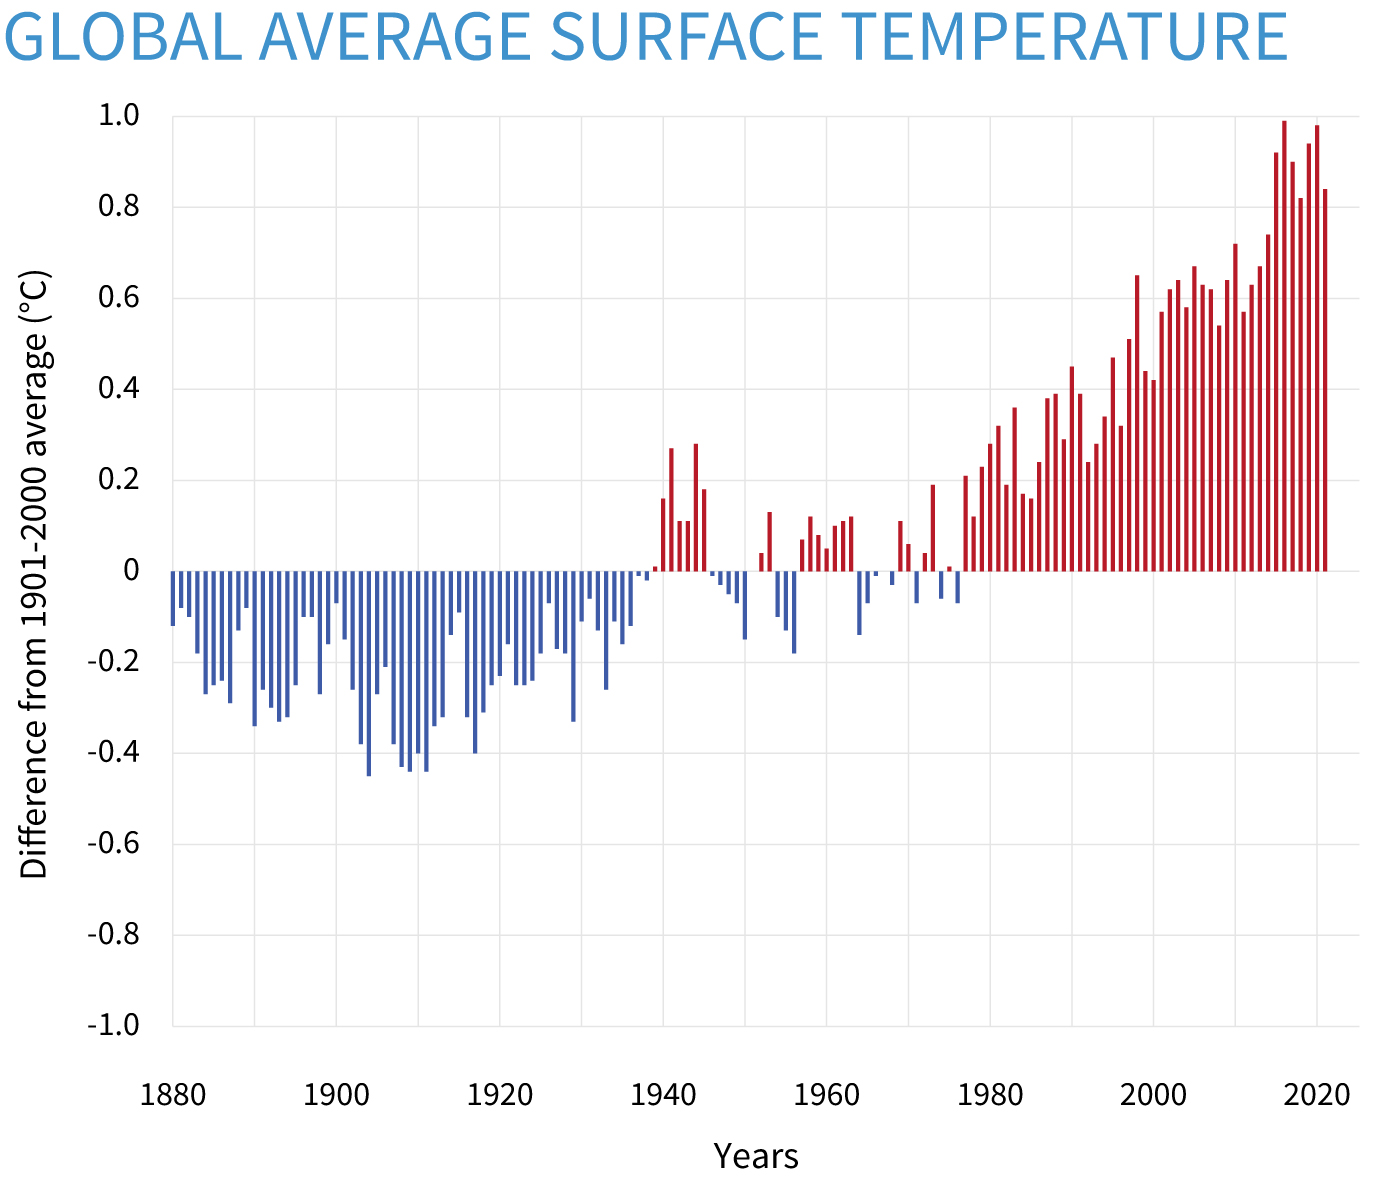

In [6]:
import urllib.request

from PIL import Image


image_path = '/content/ClimateDashboard.jpg'
#resp = urllib.request.urlretrieve("file:///Users/Ritesh/Downloads/ritesh-toronto-1.jpg")

img = Image.open(image_path)

display(img)

#image made available via a LINK

In [9]:
from openai import OpenAI

response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url":"https://ichef.bbci.co.uk/news/2048/cpsprodpb/287B/production/_105236301_aus_temp-nc.png",

        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0].message.content)

The image is a bar chart titled "Australia has been getting warmer." It shows the annual mean temperature variations above or below the average in degrees Celsius. The years are plotted on the horizontal axis, starting from 1910 to roughly 2018. Each bar represents a year. The bars above the zero line (in red) indicate years when the mean temperature was above the average, while those below the zero line (in blue) indicate years when it was below the average.

There's a clear trend visible in the chart, with a substantial increase in the number of years with temperatures above the average, especially in the most recent decades. The note at the bottom of the chart states that the average is calculated from data between 1961 and 1990. The source of the data is cited as the Australian Government Bureau of Meteorology, and the chart includes the BBC logo at the bottom right corner, indicating it might have been published or used by the British Broadcasting Corporation.


#feeding image from your local device/storage

**Note :**upload the image to the colab notebook and specify the path in *image_path*

In [10]:
import base64
import requests
import json

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "/content/ClimateDashboard.jpg"

# Getting the base64 string
base64_image = encode_image(image_path)

headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {openai.api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What does this graph/image mean ?"
        },
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 300
}

response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()  # Parse JSON response into a dictionary

    # Access 'choices' key
    if 'choices' in response_data:
        choices = response_data['choices']
        if choices and len(choices) > 0:
            content = choices[0].get('message', {}).get('content', '')
            print(content)
        else:
            print("No choices found in the response.")
    else:
        print("'choices' not found in the response.")
else:
    print("Failed to get a valid response", response.status_code)

text_to_speech = content

This graph represents the changes in global average surface temperature over time, with data spanning from the late 19th century through to the present. The y-axis shows the temperature difference in degrees Celsius from the 1901-2000 average, so it reflects how much warmer or cooler each year is compared to this baseline period.

The bars represent individual years. Blue bars indicate years that were cooler than the 20th-century average, and red bars represent years that were warmer. As the graph progresses from left (1880) to right (towards 2020), you can see a clear trend: while earlier years were often cooler (blue bars), recent years show an increased number of warmer years (red bars) above the baseline, indicating an upward trend in global temperatures. This pattern is widely attributed to human-induced climate change, primarily due to increased concentrations of greenhouse gases in the atmosphere.


In [11]:
speech_file_path =  "ritesh.mp3"
response = client.audio.speech.create(
  model="tts-1",
  voice="alloy",
  input=text_to_speech
)


In [12]:
response.stream_to_file(speech_file_path)
Audio(speech_file_path)